# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# from scipy.stats import linregress as st
import scipy.stats as st

from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Lists for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [7]:
#set base url for openweathermap and set units to imperial
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#create count and set variables and lists for weather attributes
count = 0
set_num = 1
city_name = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
long = []


print("Beginning Data Retrieval")
print("------------------------")

#Loop through cities form the random list 

for city in cities:
    #if city is in the weather data, update the URL 
    try: 
        response = requests.get(query_url + city).json()
        # if the counter has reached 50, then increment the set and reset the counter
        if count == 50:
            count = 0
            set_num += 1
            time.sleep(60)
            
        #if the counter has not reached 50, increment counter and add current city's details to the corresponding list
        else:
            count += 1
            print(f"Processing Record {count} of Set {set_num} | {city}")
            city_name.append(response["name"])
            max_temp.append(response["main"]["temp_max"])
            humidity.append(response["main"]["humidity"]) 
            cloudiness.append(response["clouds"]["all"])
            wind_speed.append(response["wind"]["speed"]) 
            country.append(response["sys"]["country"] )
            date.append(response['dt'])
            lat.append(response["coord"]["lat"])
            long.append(response["coord"]["lon"])
    # if the city is not found, create an exception, print to screen, and continue through the code            
    except:
        print("City not found. Skipping...")
        pass
    
#print showing end of process
print('''
-----------------------
Data Retrieval Complete   
-----------------------
''')
            
       
  
        

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | tambura
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | zaysan
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | kutum
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | buluang
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | lumeje
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | atyrau
Processing Record 19 of Set 1 | gorontalo
Processing Record 20 of Set 1 | vardo
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | rikitea
Processing Re

Processing Record 38 of Set 4 | gwadar
Processing Record 39 of Set 4 | ilulissat
Processing Record 40 of Set 4 | ribeira grande
Processing Record 41 of Set 4 | batagay
Processing Record 42 of Set 4 | punta alta
Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | manggar
Processing Record 45 of Set 4 | lucatan
City not found. Skipping...
Processing Record 46 of Set 4 | ruteng
Processing Record 47 of Set 4 | naze
Processing Record 48 of Set 4 | najran
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | along
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 5 | santa cruz
Processing Record 3 of Set 5 | banda aceh
Processing Record 4 of Set 5 | selma
Processing Record 5 of Set 5 | maragogi
Processing Record 6 of Set 5 | camocim
Processing Record 7 of Set 5 | ksenyevka
City not found. Skipping...
Processing Record 8 of Set 5 | thompson
Processing Record 9 of Set 5 | kaitangata
Processing Record 10 of Set 5 

Processing Record 28 of Set 8 | uruzgan
Processing Record 29 of Set 8 | ban nahin
Processing Record 30 of Set 8 | corrente
Processing Record 31 of Set 8 | winslow
Processing Record 32 of Set 8 | kargasok
Processing Record 33 of Set 8 | codrington
Processing Record 34 of Set 8 | satitoa
City not found. Skipping...
Processing Record 35 of Set 8 | kavieng
Processing Record 36 of Set 8 | burica
City not found. Skipping...
Processing Record 37 of Set 8 | luwuk
Processing Record 38 of Set 8 | dutse
Processing Record 39 of Set 8 | ugoofaaru
Processing Record 40 of Set 8 | airai
Processing Record 41 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 8 | narsaq
Processing Record 43 of Set 8 | carnarvon
Processing Record 44 of Set 8 | havre-saint-pierre
Processing Record 45 of Set 8 | guarapari
Processing Record 46 of Set 8 | baisha
Processing Record 47 of Set 8 | svetlogorsk
Processing Record 48 of Set 8 | sokolo
Processing Record 49 of Set 8 | letlhakane
Processin

Processing Record 16 of Set 12 | gao
Processing Record 17 of Set 12 | grand-santi
Processing Record 18 of Set 12 | nawashahr
Processing Record 19 of Set 12 | kloulklubed
Processing Record 20 of Set 12 | verkhoyansk
Processing Record 21 of Set 12 | suhbaatar
Processing Record 22 of Set 12 | grafton
Processing Record 23 of Set 12 | calabar
Processing Record 24 of Set 12 | talas
Processing Record 25 of Set 12 | nantucket
Processing Record 26 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 27 of Set 12 | merauke
Processing Record 28 of Set 12 | maarianhamina
Processing Record 29 of Set 12 | beaverlodge
Processing Record 30 of Set 12 | shelburne
Processing Record 31 of Set 12 | aykhal
Processing Record 32 of Set 12 | poarta alba
Processing Record 33 of Set 12 | moron
Processing Record 34 of Set 12 | koumac
Processing Record 35 of Set 12 | muhos
Processing Record 36 of Set 12 | tulun
Processing Record 37 of Set 12 | bukama

-----------------------
Data Retrieval Complete 

In [8]:
#create a dataframe from the lists that were created

df = pd.DataFrame({"City" : (city_name),
                   "Lat" : (lat),
                   "Lng" :(long),
                   "Max Temp" : (max_temp),
                   "Humidity" : (humidity),
                   "Cloudiness" : (cloudiness),
                   
                   "Wind Speed" : (wind_speed),
                   "Country" : (country),
                   "Date" : (date),
                 }).dropna()


In [9]:
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tambura,5.6000,27.4667,71.22,41,75,4.03,SS,1639971071
1,Hithadhoo,-0.6000,73.0833,82.15,76,90,7.18,MV,1639971071
2,Zaysan,47.4667,84.8667,26.10,88,100,2.48,KZ,1639971072
3,Kahului,20.8947,-156.4700,74.46,92,75,16.11,US,1639971072
4,Kutum,14.2000,24.6667,54.82,32,0,6.31,SD,1639971072
...,...,...,...,...,...,...,...,...,...
540,Morón,-34.6534,-58.6198,76.98,77,0,3.78,AR,1639971623
541,Koumac,-20.5667,164.2833,82.47,69,58,5.73,NC,1639971886
542,Muhos,64.8080,25.9931,4.78,91,7,4.74,FI,1639971886
543,Tulun,54.5611,100.5792,-10.93,94,64,2.98,RU,1639971886


In [27]:
#save the dataframe to a csv
df.to_csv("data.csv", index=True, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
# Determine that there are no cities with humidity over 100%
over_100_df = df.loc[df["Humidity"] > 100 ]
over_100_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [29]:
#set the variables for the columns for clarity

latitude = df["Lat"]
temperature = df["Max Temp"]
humidity = df["Humidity"]
cloudiness = df["Cloudiness"]
windspeed = df["Wind Speed"]
date = df["Date"]
max_temp = df["Max Temp"]
today = time.strftime("%m/%d/%Y")

The correlation coefficient between latitude and temperature is -0.75, indicating negative correlation.


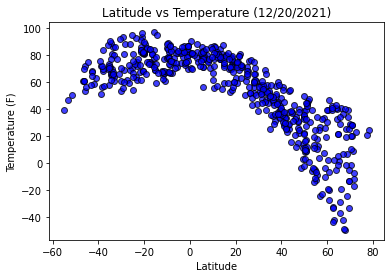

In [30]:
#create scatter plot comparing latitude versus temp.
plt.scatter(latitude, temperature, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"Latitude vs Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)");

print(f"The correlation coefficient between latitude and temperature is {round(st.pearsonr(latitude, max_temp)[0],2)}, indicating negative correlation.") 
plt.savefig("./images/lat_vs_temp.png")



## Latitude vs. Humidity Plot

The correlation coefficient between latitude and temperature is 0.15, indicating a small positve correlation.


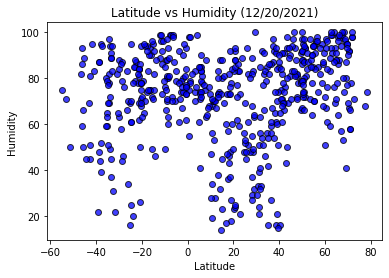

In [31]:
#create scatter plot comparing latitude versus humidity.
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"Latitude vs Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The correlation coefficient between latitude and temperature is {round(st.pearsonr(latitude, humidity)[0],2)}, indicating a small positve correlation.") 
plt.savefig("./images/lat_vs_hum.png");

## Latitude vs. Cloudiness Plot

The correlation coefficient between latitude and temperature is 0.19, indicating a small positve correlation.


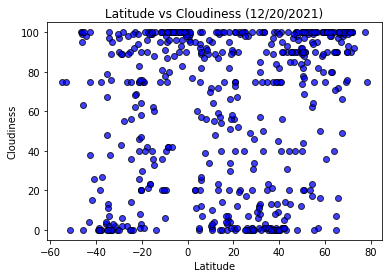

In [32]:
#create scatter plot comparing latitude versus cloudiness.
plt.scatter(latitude, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"Latitude vs Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The correlation coefficient between latitude and temperature is {round(st.pearsonr(latitude, cloudiness)[0],2)}, indicating a small positve correlation.") 

plt.savefig("./images/lat_vs_cloudiness.png");

## Latitude vs. Wind Speed Plot

The correlation coefficient between latitude and temperature is 0.07, indicating very little correlation.


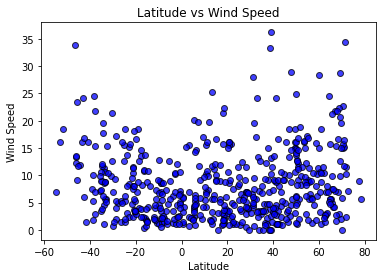

In [33]:
#create scatter plot comparing latitude versus wind speed.

plt.scatter(latitude, wind_speed, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The correlation coefficient between latitude and temperature is {round(st.pearsonr(latitude, wind_speed)[0],2)}, indicating very little correlation.") 

plt.savefig("./images/lat_vs_windspeed.png");

## Linear Regression

In [34]:
northern = df.loc[df["Lat"] >= 0, :]
southern = df.loc[df["Lat"] < 0, :]

n_latitude = northern["Lat"]
n_max_temp = northern["Max Temp"]
n_temperature = northern["Max Temp"]
n_humidity = northern["Humidity"]
n_cloudiness = northern["Cloudiness"]
n_windspeed = northern["Wind Speed"]
n_date = northern["Date"]

s_latitude = southern["Lat"]
s_max_temp = southern["Max Temp"]
s_temperature = southern["Max Temp"]
s_humidity = southern["Humidity"]
s_cloudiness = southern["Cloudiness"]
s_windspeed = southern["Wind Speed"]
s_date = southern["Date"]
today = time.strftime("%m/%d/%Y")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

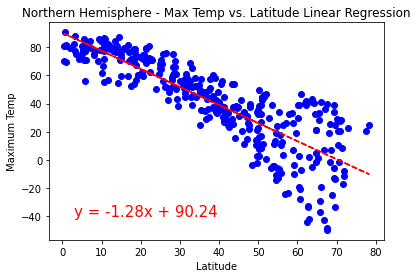

The r-squared value is 0.7160719101515425j, indicating a strong correlation.


<Figure size 432x288 with 0 Axes>

In [35]:
# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_latitude, n_max_temp)
regress_values = n_latitude * slope + intercept
line = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.annotate(line, (3, -40), fontsize = 15, color = "red")
plt.scatter(n_latitude, n_max_temp, color = "blue")
plt.plot(n_latitude, regress_values,"--", color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression" )
plt.xlabel('Latitude')
plt.ylabel('Maximum Temp')
plt.show();


print(f"The r-squared value is {rvalue**2}j, indicating a strong correlation.")
plt.savefig("./images/lin_regress_north_lat_vs_max_temp.png");

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

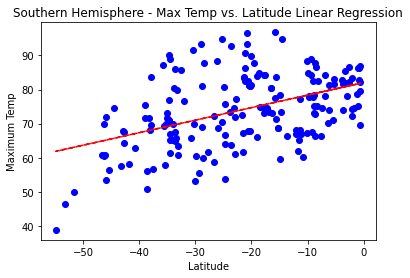

The r-squared value is 0.2089777033599268, indicating weak correlation.


<Figure size 432x288 with 0 Axes>

In [36]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_latitude, s_max_temp)
regress_values = s_latitude * slope + intercept
line = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.annotate(line, (-55, 100), fontsize = 15, color = "red")
plt.scatter(s_latitude, s_max_temp, color = "blue")
plt.plot(s_latitude, regress_values,"--", color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression" )
plt.xlabel('Latitude')
plt.ylabel('Maximum Temp')
plt.show()
print(f"The r-squared value is {rvalue**2}, indicating weak correlation.")
plt.savefig("./images/lin_regress_south_lat_vs_max_temp.png");

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

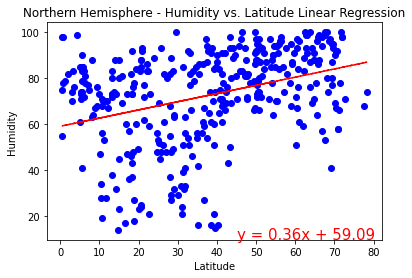

The r-squared value is 0.12242280102697004, indicating weak correlation.


<Figure size 432x288 with 0 Axes>

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_latitude, n_humidity)
regress_values = n_latitude * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line,(45,10),fontsize=15,color="red")
plt.scatter(n_latitude, n_humidity, color = "blue")
plt.plot(n_latitude, regress_values,"--", color = "red")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression" )
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-squared value is {rvalue**2}, indicating weak correlation.")
plt.savefig("./images/lin_regress_north_lat_vs_hum.png");

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

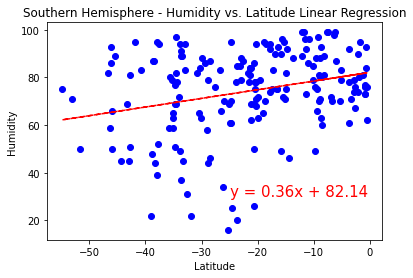

The r-squared value is 0.07410263341565242, indicating weak or no correlation.


<Figure size 432x288 with 0 Axes>

In [41]:

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_latitude, s_humidity)
regress_values = s_latitude * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line, (-25,30), fontsize = 15, color ="red")
plt.scatter(s_latitude, s_humidity, color = "blue")
plt.plot(s_latitude, regress_values,"--", color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression" )
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-squared value is {rvalue**2}, indicating weak or no correlation.")
plt.savefig("./images/lin_regress_south_lat_vs_hum.png");

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

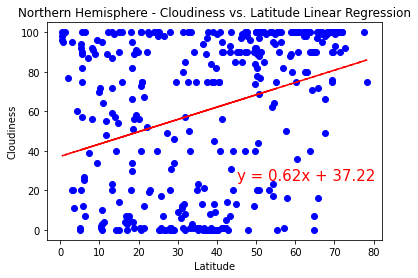

The r-squared value is 0.10319562392038643, indicating weak correlation.


<Figure size 432x288 with 0 Axes>

In [42]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_latitude, n_cloudiness)
regress_values = n_latitude * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line, (45,25), fontsize = 15, color = "red")
plt.scatter(n_latitude, n_cloudiness, color = "blue")
plt.plot(n_latitude, regress_values,"--", color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression" )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-squared value is {rvalue**2}, indicating weak correlation.")
plt.savefig("./images/lin_regress_north_lat_vs_clouds.png");

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

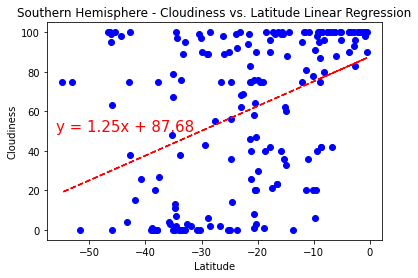

The r-squared value is 0.1827040908087164, indicating weak correlation.


<Figure size 432x288 with 0 Axes>

In [43]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_latitude, s_cloudiness)
regress_values = s_latitude * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line, (-56,50), fontsize = 15, color = "red")
plt.scatter(s_latitude, s_cloudiness, color = "blue")
plt.plot(s_latitude, regress_values,"--", color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression" )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-squared value is {rvalue**2}, indicating weak correlation.")
plt.savefig("./images/lin_regress_south_lat_vs_clouds.png");

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

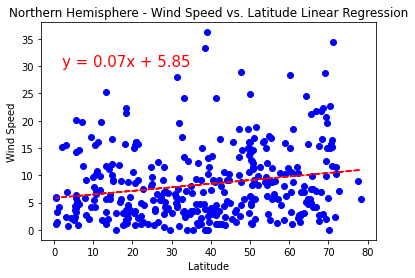

The r-squared value is 0.04121450050456878, indicating very weak or no correlation.


<Figure size 432x288 with 0 Axes>

In [46]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_latitude, n_windspeed)
regress_values = n_latitude * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line, (2,30) ,fontsize = 15, color ="red")
plt.scatter(n_latitude, n_windspeed, color = "blue")
plt.plot(n_latitude, regress_values,"--", color="red")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression" )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-squared value is {rvalue**2}, indicating very weak or no correlation.")
plt.savefig("./images/lin_regress_north_lat_vs_wind_speed.png");

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

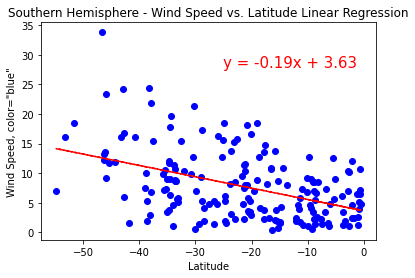

The r-squared value is 0.19884594973833383, indicating weak correlation.


<Figure size 432x288 with 0 Axes>

In [47]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_latitude, s_windspeed)
regress_values = s_latitude * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line, (-25, 28), fontsize = 15, color ="red")
plt.scatter(s_latitude, s_windspeed, color="blue")
plt.plot(s_latitude, regress_values,"--", color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression" )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed, color="blue"')
plt.show()
print(f"The r-squared value is {rvalue**2}, indicating weak correlation.")
plt.savefig("./images/lin_regress_south_lat_vs_wind_speed.png");